CE066-ML-LAB4-Jaydeep Mahajan

Task 2: Apply algorithm on breast cancer wisconsin dataset - One Hot Encoding of features: and Train test Division 60%-40%

In [3]:
from sklearn.datasets import load_breast_cancer
X,y = load_breast_cancer(return_X_y=True)

In [4]:
print("Features shape : ",X.shape)
print("Label shape: ",y.shape)

Features shape :  (569, 30)
Label shape:  (569,)


In [5]:
print(X[0]) 

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [6]:
label = ['Benign','Malignant']
print(label[y[0]]) #0 -> Benign 1 ->Malignant

Benign


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=66)

In [9]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9429824561403509


In [10]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 77,   3],
       [ 10, 138]])

In [11]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

precision: 0.9787234042553191
recall: 0.9324324324324325


In [12]:
y_pred = clf.predict(X[20].reshape(1,-1))
print("Predicted : ",label[int(y_pred)])
print("Actual : ",label[y[20]])

Predicted :  Malignant
Actual :  Malignant


In [13]:
  load_breast_cancer().feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

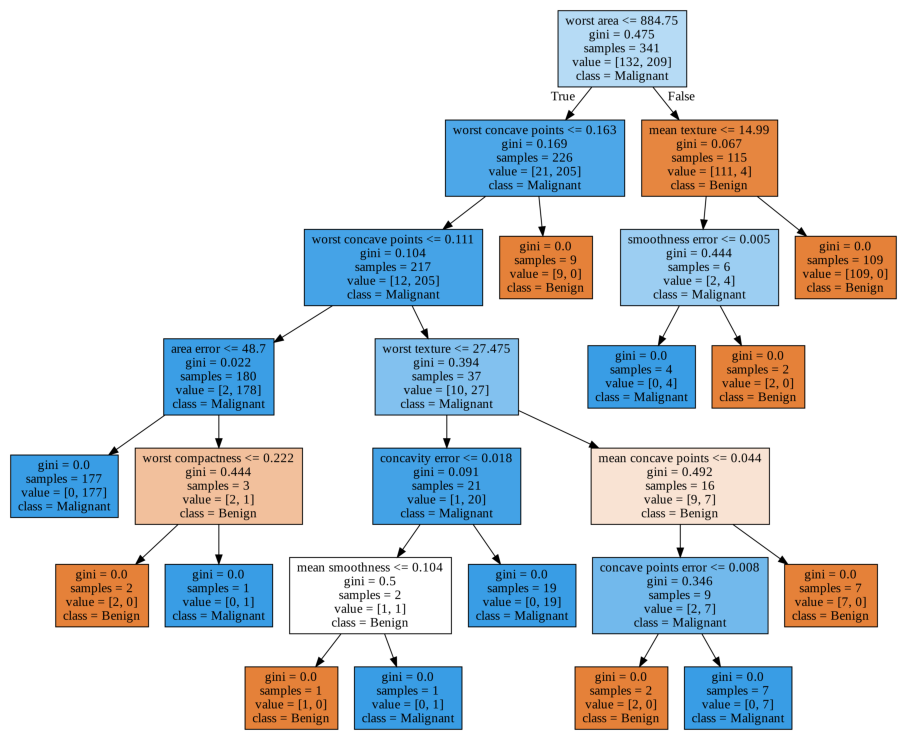

In [14]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='tree_entropy.dot',
               feature_names=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                              'mean smoothness', 'mean compactness', 'mean concavity',
                              'mean concave points', 'mean symmetry', 'mean fractal dimension',
                              'radius error', 'texture error', 'perimeter error', 'area error',
                              'smoothness error', 'compactness error', 'concavity error',
                              'concave points error', 'symmetry error',
                              'fractal dimension error', 'worst radius', 'worst texture',
                              'worst perimeter', 'worst area', 'worst smoothness',
                              'worst compactness', 'worst concavity', 'worst concave points',
                              'worst symmetry', 'worst fractal dimension'],
               class_names=['Benign','Malignant'], 
               filled=True)

#Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

#Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 20))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();